In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
clean_df = pd.read_csv('../data/processed/processed_data.csv')
clean_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Making questions:

**Question 1:** will the status of patient's life and diseases affect to the probability of stroke?

**Step 1:** we will consider the status of patient's marriage to ask: whether marriage status will influence strongly on the probability of stroke? Additionally, about the place where patient live to ask: if accomodation will also affect to the probability of stroke. Finally, we should consider what type of work does each patient work to draw some conclusion about what factor in patient's daily life affect mostly to the probability of stroke.

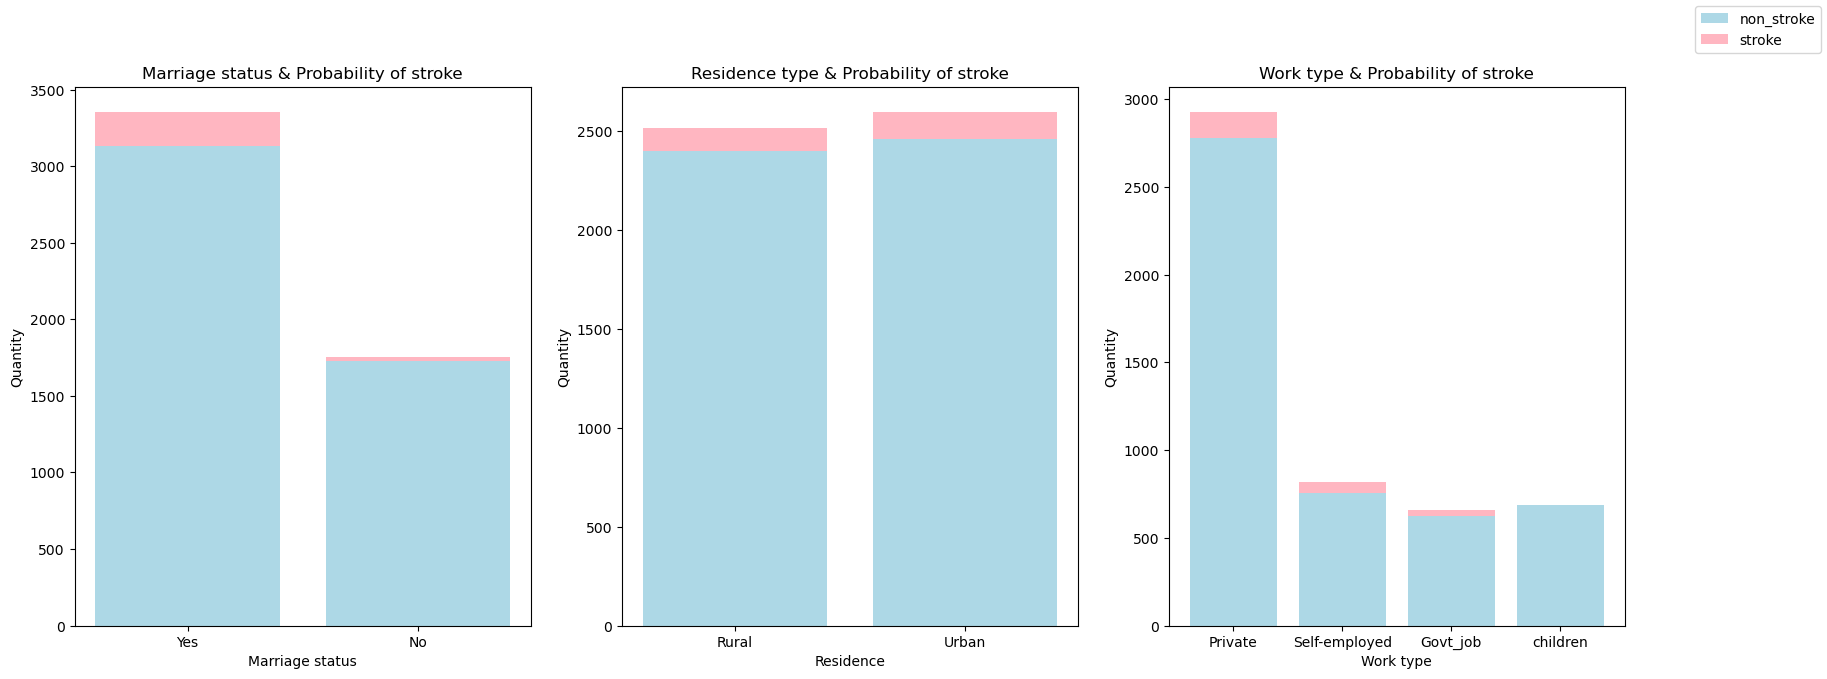

In [3]:
df_copy_stroke = clean_df[clean_df['stroke'] == 1]
df_copy_no_stroke = clean_df[clean_df['stroke'] == 0]

fig, ax = plt.subplots(1, 3, figsize = (20, 7))

freq_stroke = [len(df_copy_stroke[df_copy_stroke['ever_married'] == 'Yes']),
              len(df_copy_stroke[df_copy_stroke['ever_married'] == 'No'])]


freq_no_stroke = [len(df_copy_no_stroke[df_copy_no_stroke['ever_married'] == 'Yes']),
                 len(df_copy_no_stroke[df_copy_no_stroke['ever_married'] == 'No'])]

ax[0].bar(['Yes', 'No'], freq_no_stroke, color='lightblue')
ax[0].bar(['Yes', 'No'], freq_stroke, bottom= freq_no_stroke, color='lightpink')
ax[0].set_xlabel('Marriage status')
ax[0].set_ylabel('Quantity')
ax[0].set_title("Marriage status & Probability of stroke")

freq_stroke = [len(df_copy_stroke[df_copy_stroke['Residence_type'] == 'Rural']),
              len(df_copy_stroke[df_copy_stroke['Residence_type'] == 'Urban'])]

freq_no_stroke = [len(df_copy_no_stroke[df_copy_no_stroke['Residence_type'] == 'Rural']),
                 len(df_copy_no_stroke[df_copy_no_stroke['Residence_type'] == 'Urban'])]

ax[1].bar(['Rural', 'Urban'], freq_no_stroke, color='lightblue')
ax[1].bar(['Rural', 'Urban'], freq_stroke, bottom= freq_no_stroke, color='lightpink')
ax[1].set_xlabel('Residence')
ax[1].set_ylabel('Quantity')
ax[1].set_title("Residence type & Probability of stroke")

freq_stroke = [len(df_copy_stroke[df_copy_stroke['work_type'] == 'Private']),
              len(df_copy_stroke[df_copy_stroke['work_type'] == 'Self-employed']),
              len(df_copy_stroke[df_copy_stroke['work_type'] == 'Govt_job']),
              len(df_copy_stroke[df_copy_stroke['work_type'] == 'children'])]

freq_no_stroke = [len(df_copy_no_stroke[df_copy_no_stroke['work_type'] == 'Private']),
              len(df_copy_no_stroke[df_copy_no_stroke['work_type'] == 'Self-employed']),
              len(df_copy_no_stroke[df_copy_no_stroke['work_type'] == 'Govt_job']),
              len(df_copy_no_stroke[df_copy_no_stroke['work_type'] == 'children'])]
ax[2].bar(['Private', 'Self-employed', 'Govt_job', 'children'], freq_no_stroke, color='lightblue')
ax[2].bar(['Private', 'Self-employed', 'Govt_job', 'children'], freq_stroke, bottom= freq_no_stroke, color='lightpink')
ax[2].set_xlabel('Work type')
ax[2].set_ylabel('Quantity')
ax[2].set_title("Work type & Probability of stroke")
labels = ['non_stroke', 'stroke']
fig.legend(labels)

**Observation:** As we can see apparently that patient's residence affects very little to the probability of stroke, because the proportion of stroke in `rural` and `urban`are nearly the same. However, in term of `marriage status` and `type of work`, they seem to affect a lots to the probability of stroke. It is because there are are big differences between the patient who has a family and patient in different type of work. Specifically, patient who has married or worked for private job will be more likely to get stroke.

**Step 2:** we will consider the medical history of patient then ask: which disease will mostly affect to the probability of stroke?

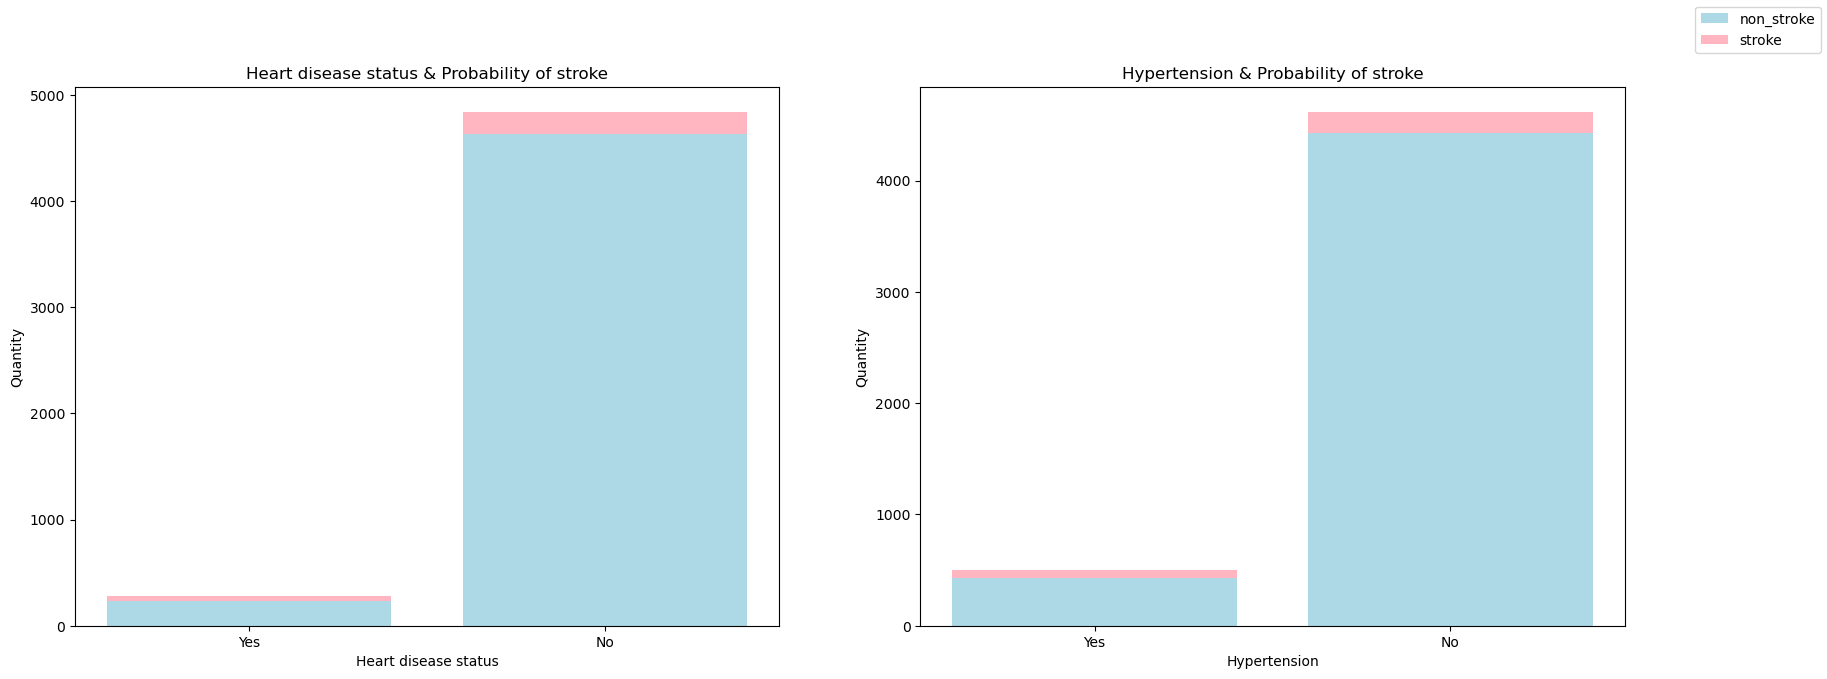

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

freq_stroke = [len(df_copy_stroke[df_copy_stroke['heart_disease'] == 1]),
              len(df_copy_stroke[df_copy_stroke['heart_disease'] == 0])]


freq_no_stroke = [len(df_copy_no_stroke[df_copy_no_stroke['heart_disease'] == 1]),
                 len(df_copy_no_stroke[df_copy_no_stroke['heart_disease'] == 0])]

ax[0].bar(['Yes', 'No'], freq_no_stroke, color='lightblue')
ax[0].bar(['Yes', 'No'], freq_stroke, bottom= freq_no_stroke, color='lightpink')
ax[0].set_xlabel('Heart disease status')
ax[0].set_ylabel('Quantity')
ax[0].set_title("Heart disease status & Probability of stroke")

freq_stroke = [len(df_copy_stroke[df_copy_stroke['hypertension'] == 1]),
              len(df_copy_stroke[df_copy_stroke['hypertension'] == 0])]

freq_no_stroke = [len(df_copy_no_stroke[df_copy_no_stroke['hypertension'] == 1]),
                 len(df_copy_no_stroke[df_copy_no_stroke['hypertension'] == 0])]

ax[1].bar(['Yes', 'No'], freq_no_stroke, color='lightblue')
ax[1].bar(['Yes', 'No'], freq_stroke, bottom= freq_no_stroke, color='lightpink')
ax[1].set_xlabel('Hypertension')
ax[1].set_ylabel('Quantity')
ax[1].set_title("Hypertension & Probability of stroke")
labels = ['non_stroke', 'stroke']
fig.legend(labels)

**Observation:** Generally, 

**Conclusion:**



**Question 2:** 

**Answering this question will** help 

**How we can answer this question:**

**Question 3:** 

**Answering this question will** help 

**How we can answer this question:**

hypertension
0.153, 0.04
marriage
0.070, 0.017


In [5]:
freq_stroke = [len(df_copy_stroke[df_copy_stroke['heart_disease'] == 1]),
              len(df_copy_stroke[df_copy_stroke['heart_disease'] == 0])]


freq_no_stroke = [len(df_copy_no_stroke[df_copy_no_stroke['heart_disease'] == 1]),
                 len(df_copy_no_stroke[df_copy_no_stroke['heart_disease'] == 0])]


freq_stroke[0] / freq_no_stroke[0], freq_stroke[1] / freq_no_stroke[1]

(0.2052401746724891, 0.043609671848013815)

tai sao o urban thi stroke lai cao hon so voi o rural.
nguyen nhan khach quan: disease, work_type.